In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

data = pd.read_csv("../data/rankings.csv")
data.head()

,consensus_ranking,player_name,team_name_abbrev,position,bye_week,best_ranking,worst_ranking,average_ranking,ranking_std,ADP,vs ADP
0,1,Christian McCaffrey,CAR,RB,13.0,1,6,1.3,1.0,1.0,0.0
1,2,Saquon Barkley,NYG,RB,11.0,1,6,2.8,1.1,2.0,0.0
2,3,Michael Thomas,NO,WR,6.0,2,11,3.6,1.5,7.0,4.0
3,4,Ezekiel Elliott,DAL,RB,10.0,2,19,3.9,1.2,3.0,-1.0
4,5,Derrick Henry,TEN,RB,7.0,2,13,5.3,2.2,6.0,1.0


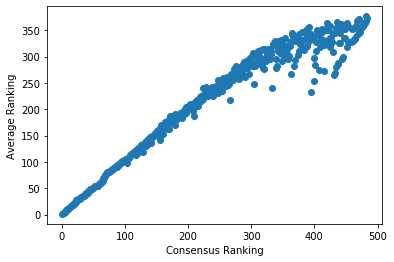

In [2]:
fig, ax = plt.subplots()
ax.scatter(data['consensus_ranking'], data['average_ranking'])
plt.ylabel('Average Ranking')
plt.xlabel('Consensus Ranking')
plt.show()

In [3]:
data_copy = data
y = data_copy['average_ranking']
X = data_copy.drop(['average_ranking'], axis=1)

In [4]:
corr_matrix = data_copy.corr()
corr_matrix['average_ranking'].sort_values(ascending=False)

average_ranking      1.000000
consensus_ranking    0.971868
ADP                  0.971760
worst_ranking        0.930179
best_ranking         0.929508
ranking_std          0.424684
bye_week            -0.016917
vs ADP              -0.166061
Name: average_ranking, dtype: float64

In [5]:
from sklearn.preprocessing import OrdinalEncoder

position_cat = X[['position']]
ordinal_encoder = OrdinalEncoder()
position_encode = ordinal_encoder.fit_transform(position_cat)
X['position'] = position_encode
X.head()

,consensus_ranking,player_name,team_name_abbrev,position,bye_week,best_ranking,worst_ranking,ranking_std,ADP,vs ADP
0,1,Christian McCaffrey,CAR,3.0,13.0,1,6,1.0,1.0,0.0
1,2,Saquon Barkley,NYG,3.0,11.0,1,6,1.1,2.0,0.0
2,3,Michael Thomas,NO,5.0,6.0,2,11,1.5,7.0,4.0
3,4,Ezekiel Elliott,DAL,3.0,10.0,2,19,1.2,3.0,-1.0
4,5,Derrick Henry,TEN,3.0,7.0,2,13,2.2,6.0,1.0


In [6]:
X['bye_week'].fillna(method='ffill')
X['vs ADP'].fillna(method='ffill')
X['ADP'].fillna(method='ffill', inplace=True)

In [7]:
from sklearn.cluster import KMeans
 
categories = ['position', 'best_ranking', 'worst_ranking', 'ranking_std']
X = X[categories]
k = 14
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

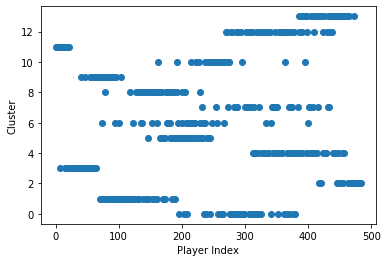

In [8]:
data_copy['cluster'] = y_pred
plt.scatter(data_copy['consensus_ranking'], data_copy['cluster'])
plt.ylabel('Cluster')
plt.xlabel('Player Index')
plt.show()

In [9]:
data_copy.tail()

,consensus_ranking,player_name,team_name_abbrev,position,bye_week,best_ranking,worst_ranking,average_ranking,ranking_std,ADP,vs ADP,cluster
478,479,Khari Blasingame,TEN,RB,7.0,363,363,363.0,0.0,NaN,NaN,2
479,480,Jordan Scarlett,CAR,RB,13.0,353,374,363.5,10.5,NaN,NaN,2
480,481,Devine Ozigbo,JAC,RB,7.0,366,385,376.7,7.9,NaN,NaN,2
481,482,Ross Dwelley,SF,TE,11.0,365,369,367.0,2.0,NaN,NaN,2
482,483,Richie James,SF,WR,11.0,369,379,374.0,5.0,NaN,NaN,2


In [10]:
data_copy['diff'] = data_copy['worst_ranking']-data_copy['best_ranking']
data_copy['worst_ranking']

0        6
1        6
2       11
3       19
4       13
      ... 
478    363
479    374
480    385
481    369
482    379
Name: worst_ranking, Length: 483, dtype: int64

In [17]:
error_bars = [data_copy['best_ranking'], data_copy['worst_ranking']]

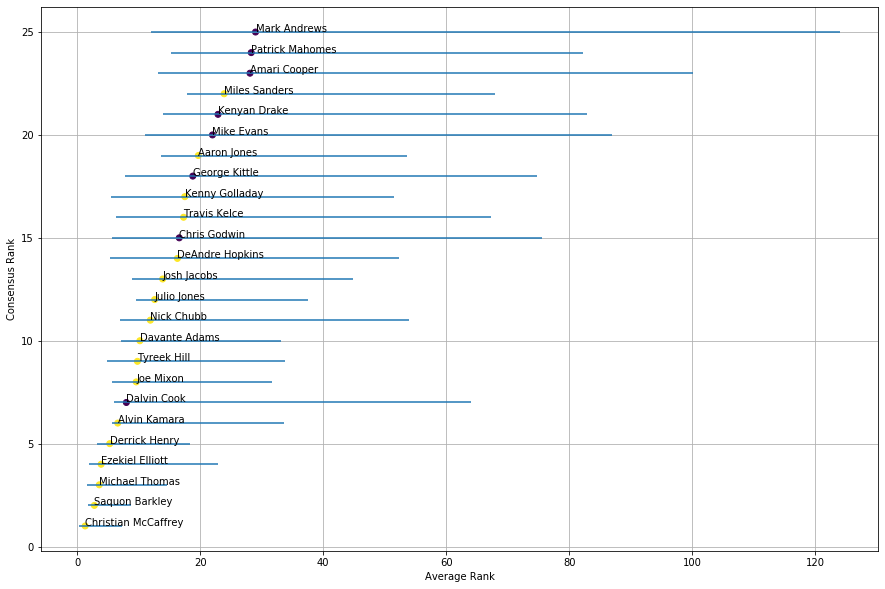

In [19]:
data_copy = data_copy.iloc[:25]
error_bars = error_bars[:25]

fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(data_copy['average_ranking'], data_copy['consensus_ranking'].sort_values(ascending=True), c=data_copy['cluster'])
plt.ylabel('Consensus Rank')
plt.xlabel('Average Rank')
plt.errorbar(data_copy['average_ranking'], data_copy['consensus_ranking'].sort_values(ascending=True), xerr=error_bars, linestyle='None')
plt.grid()

for i, txt in enumerate(data_copy['player_name']):
    ax.annotate(txt, (data_copy['average_ranking'][i], data_copy['consensus_ranking'][i]))
    
plt.show()

In [ ]:
color_iter = iter(plt.cm.rainbow(np.linspace(0, 5, len(data_copy['cluster'].unique()))))
data_copy['color'] = [0]*len(data_copy['cluster'])
print(color_iter)
for clust in data_copy['cluster'].unique():
    #curr_color = next(color_iter)
    data_copy.loc[data_copy['cluster'] == clust, ['color']] = 'red'
    
data_copy.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

seen_cluster = []
for i in range(0,len(data_copy['player_name'])):
    plt.scatter(data_copy['average_ranking'][i], data_copy['consensus_ranking'].sort_values(ascending=True)[i], c=colors[data_copy['cluster'][i]])
    #plt.errorbar(data_copy['average_ranking'][i], data_copy['consensus_ranking'].sort_values(ascending=True)[i], xerr=error_bars[i], linestyle='None', ecolor=data_copy['cluster'])
    #ax.annotate(data_copy['player_name'][i], (data_copy['average_ranking'][i], data_copy['consensus_ranking'][i]))

In [ ]:
import seaborn as sns
sns.pairplot(x_vars='average_ranking', y_vars='consensus_ranking', data=data_copy, hue='cluster')